# PROYECTO N°4: A Visual History of Nobel Prize Winners
Explora un conjunto de datos de Kaggle que contiene el valor de un siglo de premios Nobel. ¿Quién ganó? ¿A quién desprestigiaron?

**Descripción del proyecto**
<p>
El Premio Nobel es quizás el premio científico más conocido del mundo. Cada año se entrega a científicos y académicos en química, literatura, física, medicina, economía y paz. El primer Premio Nobel fue entregado en 1901, y en ese momento el premio era eurocéntrico y centrado en los hombres, pero hoy en día no está sesgado de ninguna manera. Seguro, ¿verdad?
</p>
<p>
¡Bueno, averigüemos! _¿Qué características tienen los ganadores del premio?_ ; _¿Qué país lo consigue más a menudo?_ ; _¿Y alguien lo ha conseguido dos veces?_ Depende de ti averiguar esto.
</p>
<p>
El <a href="https://www.kaggle.com/nobelfoundation/nobel-laureates">dataset</a> utilizado en este proyecto es de la Fundación Nobel en Kaggle.
</p>

**Project Tasks**
1. The most Nobel of Prizes
2. So, who gets the Nobel Prize?
3. USA dominance
4. USA dominance, visualized
5. What is the gender of a typical Nobel Prize winner?
6. The first woman to win the Nobel Prize
7. Repeat laureates
8. How old are you when you get the prize?
9. Age differences between prize categories
10. Oldest and youngest winners
11. You get a prize!

---

## 1. The most Nobel of Prizes
**(El mayor premio Nobel)**

<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>
El Premio Nobel es quizás el premio científico más conocido del mundo. Excepto por el honor, el prestigio y el sustancial premio en metálico, el destinatario también recibe una medalla de oro que muestra a Alfred Nobel (1833-1896), quien estableció el premio. Cada año se entrega a científicos y académicos en las categorías de química, literatura, física, fisiología o medicina, economía y paz. El primer premio Nobel se entregó en 1901, y en ese momento el premio era muy eurocéntrico y estaba centrado en los hombres, pero hoy en día no está sesgado de ninguna manera. Seguramente. ¿Correcto?
</p>
<p>
Bueno, ¡vamos a averiguarlo! La Fundación Nobel ha puesto a disposición un conjunto de datos de todos los ganadores del premio desde el inicio del premio, en 1901, hasta 2016. Vamos a cargarlo y echar un vistazo. 
</p>

In [3]:
# Librerias
import pandas as pd
import seaborn as sns
import numpy as np

# Leyendo los datos del Premio Nobel
nobel = pd.read_csv('datasets/nobel.csv')

# Echando un vistazo a los primeros ganadores
nobel.head(6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


## 2. So, who gets the Nobel Prize?
**(Entonces, ¿quién recibe el premio Nobel?)**

Solo mirando a los primeros dos premios, o premios Nobel como también se les llama, ya vemos a una celebridad: Wilhelm Conrad Röntgen, el tipo que descubrió los rayos X. Y, de hecho, vemos que todos los ganadores en 1901 eran muchachos que venían de Europa. Pero eso fue en 1901, mirando a todos los ganadores en el conjunto de datos, desde 1901 hasta 2016, ¿qué sexo y qué país está representado con mayor frecuencia?

(Para el país, usaremos el `birth_country` del ganador, ya que el `organization_country` es NaN para todos los premios Nobel compartidos). 

In [30]:
# Muestra el número de premios Nobel (posiblemente compartidos) entregados
# entre 1901 y 2016
display(len(nobel))

# Muestre el número de premios ganados por los destinatarios masculinos y femeninos.
display(nobel['sex'].value_counts())

# Muestra el número de premios ganados por las 10 principales nacionalidades.
nationalities = nobel['birth_country'].value_counts()
nationalities.head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Russia                       17
Italy                        17
Name: birth_country, dtype: int64

## 3. USA dominance
**(Dominio de EE. UU)**

Quizás no sea tan sorprendente: el premio Nobel más común entre 1901 y 2016 fue un hombre nacido en los Estados Unidos de América. Pero en 1901 todos los ganadores eran europeos. ¿Cuándo comenzó Estados Unidos a dominar las listas de premios Nobel? 

In [43]:
# Cálculo de la proporción de ganadores nacidos en EE. UU. Por década
nobel['usa_born_winner'] = nobel['birth_country']== 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype('int64')
prop_usa_winners= nobel.groupby(['decade'], as_index=False).agg({'usa_born_winner':'mean'})
# as_index=False 
# => Para asegurar que la variable decada y la mnedia de usa_born_winner se incluya en el dataframe

# Mostrar las proporciones de ganadores nacidos en EE. UU. Por década 
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


## 4. USA dominance, visualized
**(Dominio de Estados Unidos, visualizado)**

Una tabla está bien, pero para ver cuándo Estados Unidos comenzó a dominar las listas de premios Nobel, ¡necesitamos un diagrama!

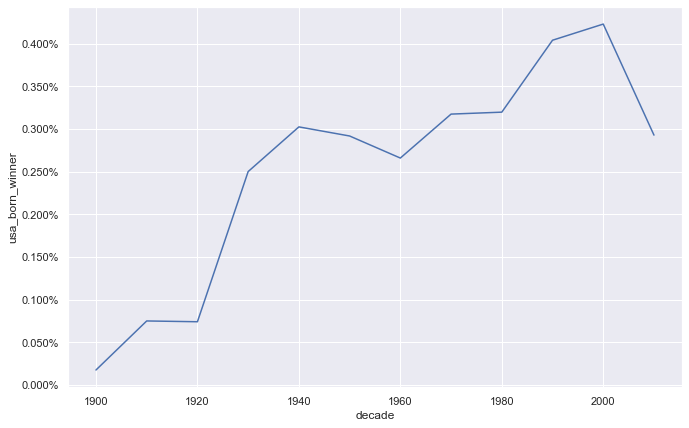

In [61]:
# Configuración del tema de trazado
sns.set()
# y estableciendo el tamaño de todas las parcelas.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11,7] # [width, height]

# Trazando ganadores nacidos en EE. UU.
ax = sns.lineplot(x="decade",y="usa_born_winner",data=prop_usa_winners)

# Agregar formato de % al eje y
import matplotlib.ticker as mtick 
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

## 5. What is the gender of a typical Nobel Prize winner?
**(¿Cuál es el género de un típico ganador del Premio Nobel?)**

Así que Estados Unidos se convirtió en el primer ganador del Premio Nobel en la década de 1930 y ha mantenido la posición de liderazgo desde entonces. Pero un grupo que estuvo a la cabeza desde el principio, y que nunca parece soltarse, son los hombres. Tal vez no debería sorprendernos que haya algún desequilibrio entre cuántos hombres y mujeres ganadores de premios hay, pero ¿qué importancia tiene este desequilibrio? ¿Y es mejor o peor dentro de categorías específicas de premios como física, medicina, literatura, etc.? 

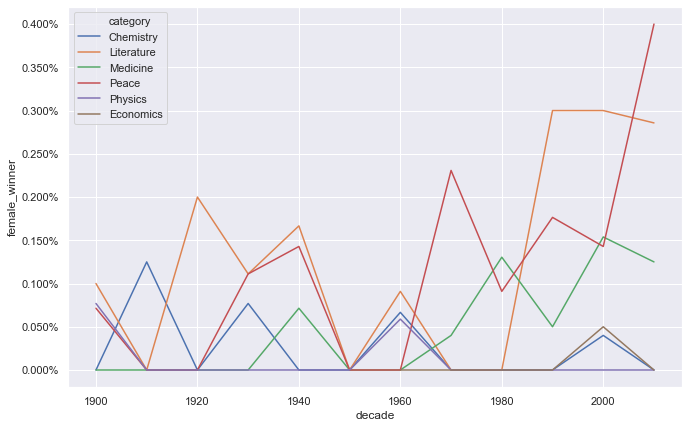

In [65]:
# Cálculo de la proporción de mujeres premiadas por década
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners= nobel.groupby(['decade','category'], 
                                   as_index=False).agg({'female_winner':'mean'})

# Representación de los ganadores nacidos en EE. UU. Con % de ganadores en el eje y
ax = sns.lineplot(x="decade",y="female_winner",data=prop_female_winners, hue="category")
import matplotlib.ticker as mtick 
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [64]:
prop_female_winners

,decade,category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
61,2010,Economics,0.000000
62,2010,Literature,0.285714
63,2010,Medicine,0.125000
64,2010,Peace,0.400000


## 6. The first woman to win the Nobel Prize
**(La primera mujer en ganar el Premio Nobel )**

La trama de arriba es un poco desordenada ya que las líneas están sobrecargadas. Pero muestra algunas tendencias y patrones interesantes. En general, el desequilibrio es bastante grande y la física, la economía y la química tienen el mayor desequilibrio. La medicina tiene una tendencia algo positiva, y desde la década de 1990 el premio de literatura también está ahora más equilibrado. El gran valor atípico es el premio de la paz durante la década de 2010, pero tenga en cuenta que esto solo cubre los años 2010 a 2016.

Dado este desequilibrio, ¿quién fue la primera mujer en recibir un premio Nobel? ¿Y en qué categoría? 

In [94]:
# Elegir a la primera mujer en ganar un Premio Nobel
nobel_fem = nobel[ nobel['sex'] == 'Female']

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nsmallest.html
# nsmallest => Devuelva las primeras n filas ordenadas por columnas en orden ascendente.
nobel_fem.nsmallest(1,'female_winner')


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


## 7. Repeat laureates
**(Premios repetidos)**

Para la mayoría de los científicos / escritores / activistas, un Premio Nobel sería el logro supremo de una larga carrera. Pero para algunas personas, uno simplemente no es suficiente y pocos lo han obtenido más de una vez. ¿Quiénes son estos pocos afortunados? (No habiendo ganado ningún premio Nobel, asumiré que se trata solo de suerte). 

In [127]:
prop_more_2_prizes= nobel.groupby(['full_name'], 
                                   as_index=False).agg({'laureate_id':'count'})
prop_more_2_prizes = prop_more_2_prizes[prop_more_2_prizes['laureate_id'] >=2]
prop_more_2_prizes

,full_name,laureate_id
141,Comité international de la Croix Rouge (Intern...,3
250,Frederick Sanger,2
433,John Bardeen,2
521,Linus Carl Pauling,2
542,"Marie Curie, née Sklodowska",2
603,Office of the United Nations High Commissioner...,2


In [126]:
# Selección de los premiados que hayan recibido 2 o más premios.

# https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html
# filter 
nobel.groupby('full_name').filter(lambda group: len(group) >= 2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


## 8. How old are you when you get the prize?
**(¿Qué edad tienes cuando recibes el premio?)**

¡La lista de ganadores repetidos contiene algunos nombres ilustres! Volvemos a encontrarnos con Marie Curie, quien obtuvo el premio en física por descubrir la radiación y en química por aislar radio y polonio. John Bardeen lo obtuvo dos veces en física para transistores y superconductividad, Frederick Sanger lo obtuvo dos veces en química y Linus Carl Pauling lo obtuvo primero en química y luego en paz por su trabajo en la promoción del desarme nuclear. También nos enteramos de que las organizaciones también obtienen el premio, ya que tanto la Cruz Roja como el ACNUR lo han obtenido dos veces.

Pero, ¿cuántos años tienes generalmente cuando recibes el premio? 

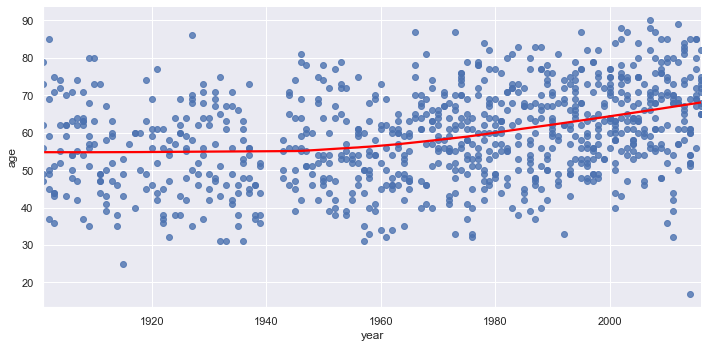

In [131]:
# Conversión de birth_date de String a datetime
nobel['birth_date']=pd.to_datetime(nobel['birth_date'])

# Cálculo de la edad de los ganadores del Premio Nobel
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# Trazando la edad de los ganadores del Premio Nobel
sns.lmplot(x="year", y="age", data=nobel,
           lowess=True, aspect=2, line_kws={'color' : 'red'});

## 9. Age differences between prize categories
**(Diferencias de edad entre las categorías de premios)**

¡La trama de arriba nos muestra mucho! Vemos que la gente solía tener alrededor de 55 años cuando recibían el precio, pero hoy en día el promedio está más cerca de los 65. Pero hay una gran diferencia en las edades de los galardonados, y aunque la mayoría tiene 50 años o más, algunos son muy jóvenes.

También vemos que la densidad de puntos es mucho más alta hoy en día que a principios del siglo XX; hoy en día se comparten muchos más premios, por lo que hay muchos más ganadores. También vemos que hubo una interrupción en los premios otorgados alrededor de la Segunda Guerra Mundial (1939-1945).

Veamos las tendencias de edad dentro de las diferentes categorías de premios. 

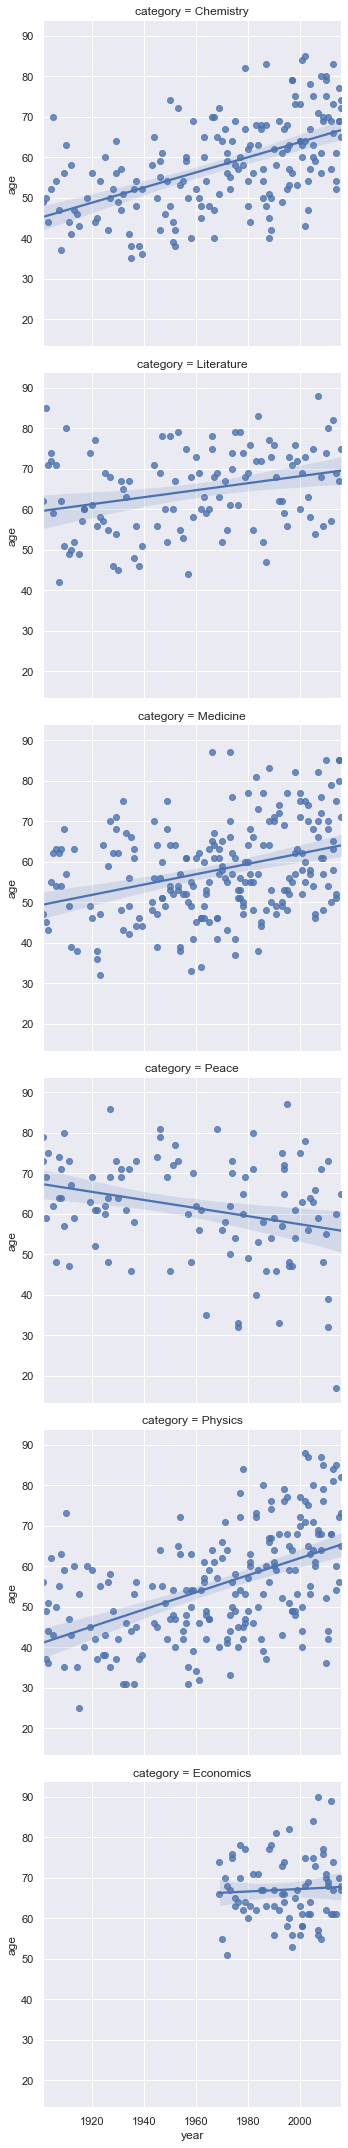

In [152]:
sns.lmplot(x = 'year', y = 'age', row = 'category',data=nobel)

## 10. Oldest and youngest winners
**(Ganadores más viejos y más jóvenes)**

¡Más tramas con muchas cosas emocionantes en marcha! Vemos que los dos ganadores del premio de química, medicina y física han envejecido con el tiempo. La tendencia es más fuerte para la física: la edad promedio solía estar por debajo de los 50 y ahora es casi de 70. La literatura y la economía son más estables. También vemos que la economía es una categoría más nueva. ¡Pero la paz muestra una tendencia opuesta donde los ganadores son cada vez más jóvenes!

En la categoría de paz también somos un ganador alrededor de 2010 que parece excepcionalmente joven. Esto plantea la pregunta: ¿quiénes son las personas más jóvenes y mayores que han ganado un premio Nobel? 

In [153]:
# El ganador de mayor edad de un premio Nobel 
nobel.nlargest(1,'age')

# El ganador más joven de un Premio Nobel
nobel.nsmallest(1,'age')

# nlargest => Devuelva las primeras n filas ordenadas por columnas en orden DESCENDENTE.
# nsmallest => Devuelva las primeras n filas ordenadas por columnas en orden ASCENDENTE.

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


## 11. You get a prize!
**(¡Obtienes un premio! )**

<p><img style="float: right;margin:20px 20px 20px 20px; max-width:200px" src="https://assets.datacamp.com/production/project_441/img/paint_nobel_prize.png"></p>
<p>
¡Oye! ¡Obtienes un premio por llegar al final de este cuaderno! Puede que no sea un premio Nobel, pero lo hice yo mismo en pintura, por lo que debería contar para algo. Pero no se desespere, Leonid Hurwicz tenía 90 años cuando recibió su premio, así que puede que no sea demasiado tarde para usted. Quién sabe.
</p>
<p>
Antes de irse, ¿cuál fue nuevamente el nombre de la ganadora más joven que en 2014 recibió el premio por "Su lucha contra la represión de niños y jóvenes y por el derecho de todos los niños a la educación"?
</p>

In [168]:
# El nombre de la ganadora más joven del Premio Nobel a partir de 2016
youngest_winner = nobel.nsmallest(1,'age').iloc[0, 7]
youngest_winner

'Malala Yousafzai'

## BIBLIOGRAFIA

- [Cheat sheet: Seaborn](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)
- [Cheat sheet: Data Wrangling with pandas](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Seaborn: visualizing linear relationships](https://seaborn.pydata.org/tutorial/regression.html)
- [Seaborn: lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)
- [Pandas: nsmallest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nsmallest.html)
- [Pandas: nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html)

## REVISAR LOS SIGUIENTES REPOSITORIOS

https://github.com/x5or6/A-Visual-History-of-Nobel-Prize-Winners/blob/master/Nobel.ipynb
    
https://zhikuanquan.com/posts/2020-04-11-blog-post-1/   